# Chapter 11. Tree
<h3 style="line-height:1.3em"> 본 실습에서는 'M-ary Tree' 생성 및 'Tree traversal algorithms(트리 순회 알고리즘)' 인  'preorder', 'inorder', 'postorder'  방법의 파이썬 구현에 대해 학습한다. </h3>

## 1. 트리 생성 
#### Python m-ary 트리(자식 노드 갯수가 최대 m 개인 트리) 생성을 위해 다음의 'Node' Python 클래스를 검토하여 보자. 
'Node' 클래스는 자신(루트 노드) 데이터, 'Node' 클래스 타입의 자식 노드들 리스트, 자식 노드 최대 허용 갯수 등을 속성으로 가진다.  
자식 노드들은 'Node' 클래스 타입이므로, 결국 자식노드들은 자신을 루트로 하는 서브트리를 갖을 수있게 된다.  
'Node' 클래스 타입 객체 생성 초기화, 노드 삽입, 트리 내의 각 노드 프린팅 등을 메소드로 갖는다.   

In [1]:
class M_ary_Node:
  # 노드 object 생성 초기화
    def __init__(self, data=None, m=2):
        self.children=[]   # 자식 노드(자식 서브트리)들 리스트
        self.m_ary=m  # 최대 허용 자식 노드  갯수  
        self.data = data   # 자신(루트노드) 데이터 값  설정 
  
  # 자식 노드 갯수를 넘지 않는 범위에서 자식 노드를 생성하고 삽입 새 데이터 값을 노드 데이터값 으로 셋팅       
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: 
                # 최대 허용 자식 노드 갯수를 넘었을 경우, 손자 노드를 생성
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return
                # 모든 자식 또한 최대 허용 갯수를 넘었을 경우, 자식 노드의 손자 노드로 생성
                self.children[0].add_child(data)    
        else:
            self.data = data

# 트리 노드 값들을 'preorder' 형식으로 출력
    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()        

### 이제, 교과서 11장 3절의 트리 순회 에서 나오는 다음 [Figure 3] 의 'm-ary 트리'를 상기  파이썬 'class Node' 를 이용하여 생성해보고, 몇개 노드를 출력해보자.
![Alt text](./ternary_tree_example.png)

In [2]:
root = M_ary_Node('a', 3)
root.add_child('b')
root.add_child('c')
root.add_child('d')
FirstChild = root.children[0]
FirstChild.add_child('e')
FirstChild.add_child('f')
ThirdChild = root.children[2]
ThirdChild.add_child('g')
ThirdChild.add_child('h')
ThirdChild.add_child('i')
FirstChild_1stChild = FirstChild.children[0]
FirstChild_1stChild.add_child('j')
FirstChild_1stChild.add_child('k')
FirstChild_3rdChild = ThirdChild.children[0]
FirstChild_3rdChild.add_child('l')
FirstChild_3rdChild.add_child('m')
SecondChild_1stChild=FirstChild_1stChild.children[1]
SecondChild_1stChild.add_child('n')
SecondChild_1stChild.add_child('o')
SecondChild_1stChild.add_child('p')    
print(ThirdChild.data)
print(root.children[2].children[2].data)

d
i


#### 상기 코드에서 "PrintTree' 는 'Preorder' 순서(추후 소개)의 트리의 노드값들의 출력이다.

In [3]:
root.PrintTree()

a
b
e
j
k
n
o
p
f
c
d
g
l
m
h
i


## 2. Traversal Algorithms (순회 알고리즘) 
###  순회알고리즘은 자료구조의 데이터를 모두 순회하는 알고리즘을 말한다.  
자료구조 중에 'm-ary 트리' 자료 구조의 데이터를 모두 순회하는  트리 순회 알고리즘에 대해 살펴 보자.  'm-ary 트리'는 루트 노드를 가지며, 각 노드는 최대 m개의 자식 노드들을 갖는 트리이다. 각 자식 노드 각각이 또 자식 노드들을  갖기 때문에 자식 노드 각각이 서브트리의 루트 노드가 되는 재귀적 자료 구조를 갖는다.  즉, m-ary 트리 = 루트 노드 + 서브 트리들 ;  서브 트리 = 루트 노드 + 서브트리들 .  

### 트리 순회 알고리즘에는  'preorder', 'postorder', 'inorder' 방법이 있다. 
<ul>
    <li>Preorder 순회는 루트 노드에서 자식 서브트리 순으로 순회하며, 자식 서브 트리는 왼쪽으로 부터 순회한다.</li>
    <li>Postorder 순회는  자식 서브트리에서 루트 노드 순으로 순회하며 자식 서브 트리는 왼쪽으로 부터 순회한다.</li>
    <li>Inorder 순회는 첫번째 왼쪽 서브트리,  루트 노드, 2번째 왼쪽부터의 서브 트리들 순으로 순회한다.</li>
</ul>

### 다음 그림은,  이진트리 (m=2) 경우에 'Preorder', 'Postorder', 'Inorder' 순회 방법을 각각 보여 준다. 
 ![Alt text](./tree_traveral_algorithm.png)

####  이제,  'Preorder', 'Postorder', 'Inorder'   순회 알고리즘  의사코드에 대해 살펴 보자. 

#  Algorithm 1. Preorder Traveral Algorithm 
### Preconditions: T is an ordered rooted tree. 
### Postconditions: Every node of T was visited exactly once.

<pre><code> 
procedure preorder(T : ordered rooted tree)
r := root of T
list r //visit the root of T
for  each child c of r from left to right 
  T(c):= subtree with c as its root
  preorder(T(c))

</code></pre>

#  Algorithm 2. Inorder Traveral Algorithm 
### Preconditions: T is an ordered rooted tree. 
### Postconditions: Every node of T was visited exactly once.

<pre><code> 

procedure inorder(T : ordered rooted tree)
r := root of T
if r is a leaf then list r
else
  l := first child of r from left to right
  T (l) := subtree with l as its root
  inorder(T (l))
  list r
  for each child c of r except for l from left to right
    T (c) := subtree with c as its root
    inorder(T (c))

</code></pre>

# Algorithm 3 Postorder Traveral Algorithm 
### Preconditions: T is an ordered rooted tree.
### Postconditions: Every node of T was visited exactly once.


<pre><code> 
procedure postorder(T : ordered rooted tree)
r := root of T
for each child c of r from left to right
   T (c) := subtree with c as its root
   postorder(T (c))
list r

</code></pre>

 이제, 상기 'Node' 클래스를 확장하여    'preorder' , 'postorder', 'inorder' traversal algorithm  를 다음과 같이 'Node' 클래스의 메소드로 구현하여 보자.


In [4]:
class M_ary_Node:
  # object 생성 초기화
    def __init__(self, data=None, m=2):
        self.children=[]   # 자식 노드들 리스트
        self.m_ary=m  # 자식 노드 최대 갯수  
        self.data = data   # 루트 노드 값  설정 
        
   # 자식 노드 갯수를 넘지 않는 범위에서 자식 노드를 생성하고 삽입 새 데이터 값을 노드 데이터값 으로 셋팅        
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: # 최대 허용 자식 노드 갯수를 넘었을 경우, 손자 노드를 생성
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return 
                self.children[0].add_child(data)    
        else:
            self.data = data
        return 0   

# 트리 노드 값들을 'preorder' 형식으로 출력
    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()   

# 이제, 트리 순회에 대해 살펴보자
# Preorder traversal ; Root -> Left ->Right
    def PreorderTraversal(self, root):
        res = []
        if root:
            res.append(root.data)
            for i in range(len(root.children)):
                res = res + self.PreorderTraversal(root.children[i])
        return res

# Postorder traversal ; Left ->Right -> Root
    def PostorderTraversal(self, root):
        res = []
        if root:
            for i in range(len(root.children)):
                res = res + self.PostorderTraversal(root.children[i])
            res.append(root.data)
        return res    

# Inorder traversal ; Left -> Root -> Right
    def InorderTraversal(self, root):
        res = []
        if root:            
            if len(root.children)!=0:           
                res = res + self.InorderTraversal(root.children[0])
            res.append(root.data)
            for i in range(1, len(root.children)):
                res = res + self.InorderTraversal(root.children[i])
            
        return res    

#### 이제, 교과서 11장 3절의 트리 순회 에서 나오는 다음 [Figure 3] 의 'm-ary 트리'를 상기  확장된 파이썬 'class Node' 를 이용하여 다시 생성한다.
![Alt text](./ternary_tree_example.png)

In [5]:
Mary_root = M_ary_Node('a', 3)
Mary_root.add_child('b')
Mary_root.add_child('c')
Mary_root.add_child('d')
FirstChild = Mary_root.children[0]
FirstChild.add_child('e')
FirstChild.add_child('f')
ThirdChild = Mary_root.children[2]
ThirdChild.add_child('g')
ThirdChild.add_child('h')
ThirdChild.add_child('i')
FirstChild_1stChild = FirstChild.children[0]
FirstChild_1stChild.add_child('j')
FirstChild_1stChild.add_child('k')
FirstChild_3rdChild = ThirdChild.children[0]
FirstChild_3rdChild.add_child('l')
FirstChild_3rdChild.add_child('m')
SecondChild_1stChild=FirstChild_1stChild.children[1]
SecondChild_1stChild.add_child('n')
SecondChild_1stChild.add_child('o')
SecondChild_1stChild.add_child('p')    
print(ThirdChild.data)
print(Mary_root.children[2].children[2].data)

d
i


#### 이제, 상기 [FIGURE 3]의 트리에 대해 , 상기 확장된 클래스 'M_ary_Node' 에 구현된 'preorder', 'Inorder', 'Postorder' 를 수행시켜 보자. 

In [6]:
print(Mary_root.PreorderTraversal(Mary_root))  # root - Left - Right 
print(Mary_root.InorderTraversal(Mary_root))   # Left - root - Right 
print(Mary_root.PostorderTraversal(Mary_root)) # Left - Right - root 

['a', 'b', 'e', 'j', 'k', 'n', 'o', 'p', 'f', 'c', 'd', 'g', 'l', 'm', 'h', 'i']
['j', 'e', 'n', 'k', 'o', 'p', 'b', 'f', 'a', 'c', 'l', 'g', 'm', 'd', 'h', 'i']
['j', 'n', 'o', 'p', 'k', 'e', 'f', 'b', 'c', 'l', 'm', 'g', 'h', 'i', 'd', 'a']


<h3 style="line-height:1.3em">다음은 상기 'class M_ary_Node' 를 변형한  이진 트리 자료구조 지원 'BTree_Node' 클래스에  'preorder' , 'postorder', 'inorder' traversal method (algorithm)  들을 구현한 Python 코드이다. </h3> 

In [7]:
class BTree_Node:
  # object 생성 초기화
    def __init__(self, data=None):
        self.left = None   # 왼쪽 서브트리 루트 노드값 설정
        self.right = None  # 오른쪽 서브트리 루트 노드값 설정 
        self.data = data   # 루트 노드 값  설정 

    # 삽입되는 새 값을 왼쪽 서브트리의 루트 노드 값 또는 오른쪽 서브트리 루트 노트 값과 비교하여 
    # 적절한 위치에  노드를 생성하고 삽입 새 데이터 값을 노드 값 으로 설정    
    def insert(self, data):
        if self.data:
            if data < self.data:
                if self.left is None:
                    self.left = BTree_Node(data)
                else:
                    self.left.insert(data)
            elif data > self.data:
                if self.right is None:
                    self.right = BTree_Node(data)
                else:
                    self.right.insert(data)
            else :
                print("The",data,"already exists.")
        else:
            self.data = data

    # 트리 노드 값들을 프린팅
    def PrintTree(self):
        print(self.data)
        if self.left:
            self.left.PrintTree()
        if self.right:
            self.right.PrintTree()
            
    # Preorder traversal
    # Root -> Left ->Right
    def PreorderTraversal(self, root):
        res = []
        if root:
            res.append(root.data)
            res = res + self.PreorderTraversal(root.left)
            res = res + self.PreorderTraversal(root.right)
        return res

    # Postorder traversal
    # Left ->Right -> Root
    def PostorderTraversal(self, root):
        res = []
        if root:
            res += self.PostorderTraversal(root.left)
            res += self.PostorderTraversal(root.right)
            res.append(root.data)
        return res    

    # Inorder traversal
    # Left -> Root -> Right
    def InorderTraversal(self, root):
        res = []
        if root:
            res += self.InorderTraversal(root.left)
            res.append(root.data)
            res += self.InorderTraversal(root.right)
        return res    

### 이제,  'preorder' , 'postorder', 'inorder' traversal algorithm  동작을 테스트 해보자.

In [8]:
broot = BTree_Node('macchiato')
broot.insert('complexify')
broot.insert('clueless')
broot.insert('poset')
broot.insert('jazzed')
broot.insert('phat')
broot.insert('sheafify')
broot.PrintTree()

macchiato
complexify
clueless
jazzed
poset
phat
sheafify


### 상기 작업에 의한 이진 트리는 다음 그림과 같다. 
![Alt text](./bin_tree_example.png)

### 이제, 'preorder' (root-Left-Right), 'postorder' (L-R-r), 'inorder' (L-r-R)  traversal algorithm 을 수행해보자. 

In [9]:
print(broot.PreorderTraversal(broot))  # root - Left- Right 
print(broot.PostorderTraversal(broot)) # Left - Right - root 
print(broot.InorderTraversal(broot))   # Left-root-Right 

['macchiato', 'complexify', 'clueless', 'jazzed', 'poset', 'phat', 'sheafify']
['clueless', 'jazzed', 'complexify', 'phat', 'sheafify', 'poset', 'macchiato']
['clueless', 'complexify', 'jazzed', 'macchiato', 'phat', 'poset', 'sheafify']


<br/>

# 이진 트리 순회  

###  'full m-ary tree' 는 트리에서 종단 노드(leaf)가 제외한 모든 내부 노드가 자식 노드를 m 개씩 가지는 트리를 말한다. 
(node는 vertex 와 같다)
#### (예) binary tree 들  ( 노드 옆의 문자는 노드에 저장된 값임)
![Altext](./bt.png)

<h3 style="line-height:1.3em"> 트리의 깊이 (depth) 는 루트로 부터 최종 단말 노드까지 단계별로 내려가면서 (올라 오는 것은 허용 안함) 도달하는 데 거치는 에지 갯수를 말한다.  상기 [그림 1]과  [그림 2]의 binary tree 의 깊이는 각각 4와 3이다. </h3>

### 상기  파이썬 'class Btree_Node' 를 이용하여  [그림 1]의 이진 트리를 생성해보자. 

In [10]:
btree_root = BTree_Node('a')
btree_root.left=BTree_Node('b')
btree_root.right=BTree_Node('k')
btree_root.left.left=BTree_Node('c')
btree_root.left.right=BTree_Node('g')
btree_root.right.left=BTree_Node('l')
btree_root.right.right=BTree_Node('m')
btree_root.left.left.left=BTree_Node('d')
btree_root.left.left.right=BTree_Node('e')
btree_root.left.left.right.left=BTree_Node('f')
btree_root.left.right.left=BTree_Node('h')
btree_root.left.right.right=BTree_Node('j')
btree_root.left.right.left.right=BTree_Node('i')
btree_root.right.right.left=BTree_Node('n')
btree_root.right.right.right=BTree_Node('o')

In [11]:
print(btree_root.PreorderTraversal(btree_root))  # root - Left- Right 
print(btree_root.PostorderTraversal(btree_root)) # Left - Right - root 
print(btree_root.InorderTraversal(btree_root))   # Left-root-Right 

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
['d', 'f', 'e', 'c', 'i', 'h', 'j', 'g', 'b', 'l', 'n', 'o', 'm', 'k', 'a']
['d', 'c', 'f', 'e', 'b', 'h', 'i', 'g', 'j', 'a', 'l', 'k', 'n', 'm', 'o']


<h3 style="line-height:1.3em">Preorder, Inorder, Postorder  순회의 경우에, 각각 'root-Left-Right', 'Left-root-Right', 'Left-Right-root' 순서로 순회한다. </h3>
[그림 1]의 이진트리에서 'root' 는 'a' 이다. [그림 1] 트리에서 Preorder, Inorder, Postorder  순서로 순회했을 때, 결과되는 리스트는  각각,  "['a'] +  left subtree 순회 결과 list + right subtree 순회 결과 list" , "left subtree 순회 결과 list + ['a'] +  right subtree 순회 결과 list",  "left subtree 순회 결과 list + right subtree 순회 결과 list+['a'] " 로 표현됨을 (d)에 구한 'Preorder', 'Inorder', 'Postorder' 순회 함수를 이용하여 확인하여 보자.

In [12]:
print(['a']+btree_root.PreorderTraversal(btree_root.left)+btree_root.PreorderTraversal(btree_root.right))
print(btree_root.InorderTraversal(btree_root.left)+['a']+ btree_root.InorderTraversal(btree_root.right))
print(btree_root.PostorderTraversal(btree_root.left)+btree_root.PostorderTraversal(btree_root.right)+['a'])

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
['d', 'c', 'f', 'e', 'b', 'h', 'i', 'g', 'j', 'a', 'l', 'k', 'n', 'm', 'o']
['d', 'f', 'e', 'c', 'i', 'h', 'j', 'g', 'b', 'l', 'n', 'o', 'm', 'k', 'a']


## 트리 깊이
### 상기  'Class BTree_Node' 를 이용하여 생성한 이진 트리의 깊이(depth)를 구하는 파이썬 함수는 다음과 같다. 

In [13]:
def BTree_depth(root, length=0):
    if root :
        print("i am", root.data, "length is", length)
        left_depth = BTree_depth(root.left, length+1)
        right_depth = BTree_depth(root.right, length+1)
        tree_depth = left_depth if left_depth > right_depth else right_depth
        return tree_depth
    else :
        return length-1

### 상기  작성된 트리 깊이를 구하는  파이썬 함수를 적용하여 [그림 1] 트리의 깊이가 4임을 확인해보자.

In [14]:
BTree_depth(btree_root)

i am a length is 0
i am b length is 1
i am c length is 2
i am d length is 3
i am e length is 3
i am f length is 4
i am g length is 2
i am h length is 3
i am i length is 4
i am j length is 3
i am k length is 1
i am l length is 2
i am m length is 2
i am n length is 3
i am o length is 3


4

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

![prob1](./prob1.png)

#### 먼저, 위처럼 M-ary Tree를 networkx 라이브러리를 통해 시각적으로 표현해보자. 

In [15]:
# We already met.
class M_ary_Node:
    def __init__(self, data=None, m=2):
        self.children=[]
        self.m_ary=m
        self.data = data
  
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: 
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return
                self.children[0].add_child(data)    
        else:
            self.data = data

    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()        

In [16]:
# Get all edges from the graph
def get_edges(root) :
    edges = []
    if root.data :
        for child in root.children :
            edges.append((root.data, child.data))
            edges = edges + get_edges(child)
    return edges

In [17]:
# Make M-ary tree
M = 3
nodes = [n for n in "abkcglmdefhjino"]
mtree = M_ary_Node(m=M)
for n in nodes : mtree.add_child(n)
edges = get_edges(mtree)

In [18]:
# Drawing codes
import networkx as nx
import matplotlib.pyplot as plt
def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()

C:\Users\user\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


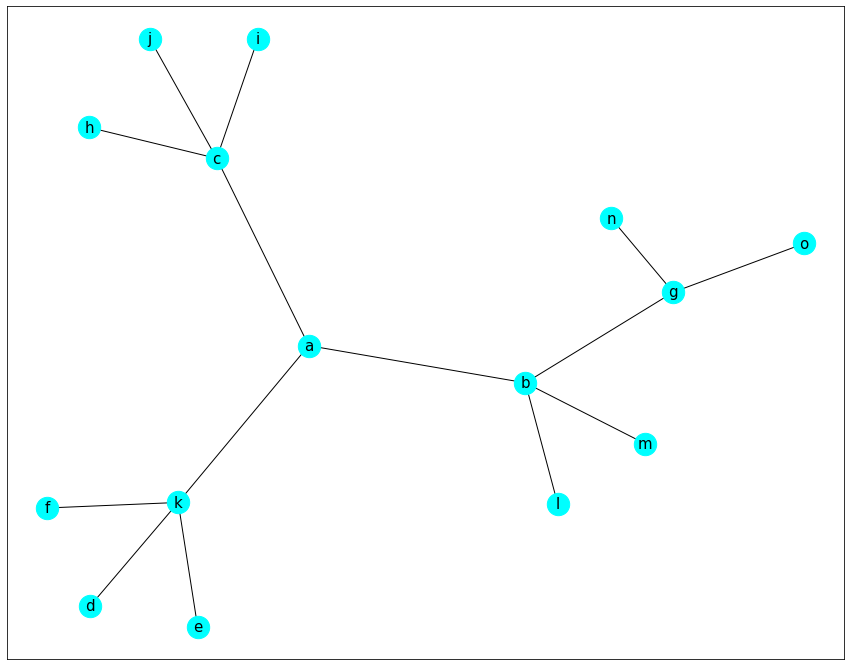

In [19]:
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
draw_graph(graph)

##  실습 1.
#### 1부터 100까지 자연수를 노드로 가지는 5-ary Tree를 만들고, 이를 시각적으로 표현해보시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 M_ary_Node 클래스를 이용하여 트리를 만든다.</li>
    <li>위에서 만든 트리를 출력 예시처럼 시각적으로 표현한다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>자유롭게 프로그래밍 한다.</li>
</ol>

#### 출력예시
![prob2](./prob2.png)

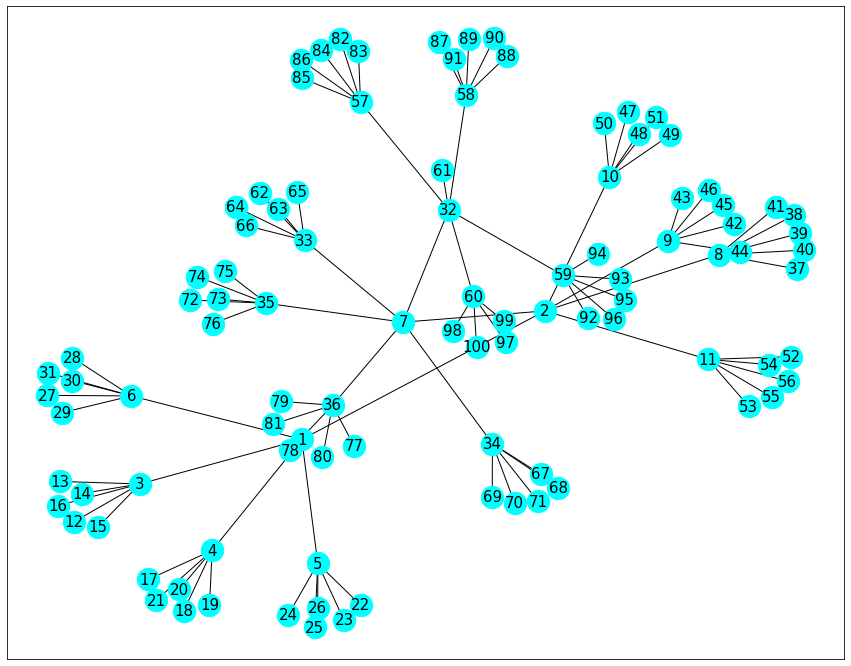

In [20]:
class M_ary_Node:
    def __init__(self, data=None, m=5):
        self.children=[]
        self.m_ary=m
        self.data = data
  
    def add_child(self, data):  
        if self.data!=None:                
            if len(self.children)< self.m_ary:           
                self.children.append(M_ary_Node(data, self.m_ary))
                return 
            else: 
                for i in range(self.m_ary):
                    if (len(self.children[i].children)<self.m_ary):
                        self.children[i].children.append(M_ary_Node(data, self.m_ary))
                        return
                self.children[0].add_child(data)    
        else:
            self.data = data

    def PrintTree(self):
        print(self.data)
        for i in range(len(self.children)):
            self.children[i].PrintTree()   

def get_edges(root) :
    edges = []
    if root.data :
        for child in root.children :
            edges.append((root.data, child.data))
            edges = edges + get_edges(child)
    return edges

M = 5
nodes = [n for n in range(1,101)]
mtree = M_ary_Node(m=M)
for n in nodes : mtree.add_child(n)
edges = get_edges(mtree)

import networkx as nx
import matplotlib.pyplot as plt
def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()
    
graph = nx.Graph()
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)
draw_graph(graph)

##  실습 2.
#### 위에서 구한 5-ary 그래프의 깊이를 출력하시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 깊이 구하는 함수를 M-ary tree 형식에 맞춰 변형하여 <b>만들어</b> 푼다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>위 사항 외에 자유롭게 프로그래밍 한다.</li>
</ol>

In [21]:
def BTree_depth(root, length=0):
    if root :
        list=[]
        for i in range(len(root.children)):
            list.append(BTree_depth(root.children[i], length+1))
        if len(list)!=0:
            tree_depth=max(list)
            return tree_depth
        else:
            return length

BTree_depth(mtree)

5

##  실습 3
#### 위에서 구한 그래프에서 preorder, inorder, postorder 방법으로 각각 순회했을 때 '100'인 노드를 몇 번째로 방문하는 지 구하시오. 
#### 단, 처음 방문하는 노드를 1번째로 방문한다고 한다.

<br/>※ 풀이조건
<ol>
    <li>아래 입력 예시 및 출력 예시를 참고한다.</li>
    <li>위 클래스를 알맞게 변형해도 된다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>위 사항 외에 자유롭게 프로그래밍 한다.</li>
</ol>

#### 입력 예시

#### 출력 예시

In [22]:
def PreorderTraversal(root):
    res = []
    if root:
        res.append(root.data)
        for i in range(len(root.children)):
            res = res + PreorderTraversal(root.children[i])
    return res

def PostorderTraversal(root):
    res = []
    if root:
        for i in range(len(root.children)):
            res = res + PostorderTraversal(root.children[i])
        res.append(root.data)
    return res    

def InorderTraversal(root):
    res = []
    if root:            
        if len(root.children)!=0:           
            res = res + InorderTraversal(root.children[0])
        res.append(root.data)
        for i in range(1, len(root.children)):
            res = res + InorderTraversal(root.children[i])        
    return res    
def when_visit(root, n):
    print("Pre-Order:", PreorderTraversal(root).index(n)+1)
    print("Post-Order:", PostorderTraversal(root).index(n)+1)
    print("In_Order", InorderTraversal(root).index(n)+1)

n=int(input("숫자 입력"))
when_visit(mtree, n)

숫자 입력50
Pre-Order: 69
Post-Order: 66
In_Order 68


##  실습 4
<h4 style="line-height:2em"> 1부터 1000까지 자연수를 노드로 가지는 binary Tree (이진 트리)를 위 M-ary 클래스를 통해 만들고 preorder, inorder, postorder 방법으로 각각 순회했을 때 '512'인 노드가 몇 번째로 방문하는 지 구하시오.</h4>

#### 만약 방문 횟수를 더 줄일 방안이 있다면, 조원들과 상의하여 '아이디어'를 설명한 글을 출력하시오.

<br/>※ 풀이조건
<ol>
    <li>위에서 학습한 <b>M-ary 클래스를 통해</b> 이진 트리를 만든다.</li>
    <li>'512' 노드를 찾을 때 더 적게 노드들을 방문하기 위해 어떤 트리 구조를 사용하는 지, 어떤 방법을 사용하는 지 등 자유롭게 아이디어를 제시한다.</li>
    <li>위 아이디어는 구현하지 않아도 된다.</li>
</ol>
<br/>※ 제한조건
<ol>
    <li>코드 내 import를 사용할 경우 0점 처리한다. <b>주의하도록 한다.</b> </li>
    <li>몇 번째로 방문하는 지 올바르게 출력하고 아이디어를 기술하면 정답처리한다.</li>
    <li>아이디어가 왜 방문 횟수가 적을 지 쓰지 않았다면 0.5점 감점한다.</li>
    <li>실제로 생각한 아이디어가 <b>방문 횟수가 더 많아도 나름 열심히 논리적으로 기술했다면</b> 정답처리한다.</li>
</ol>

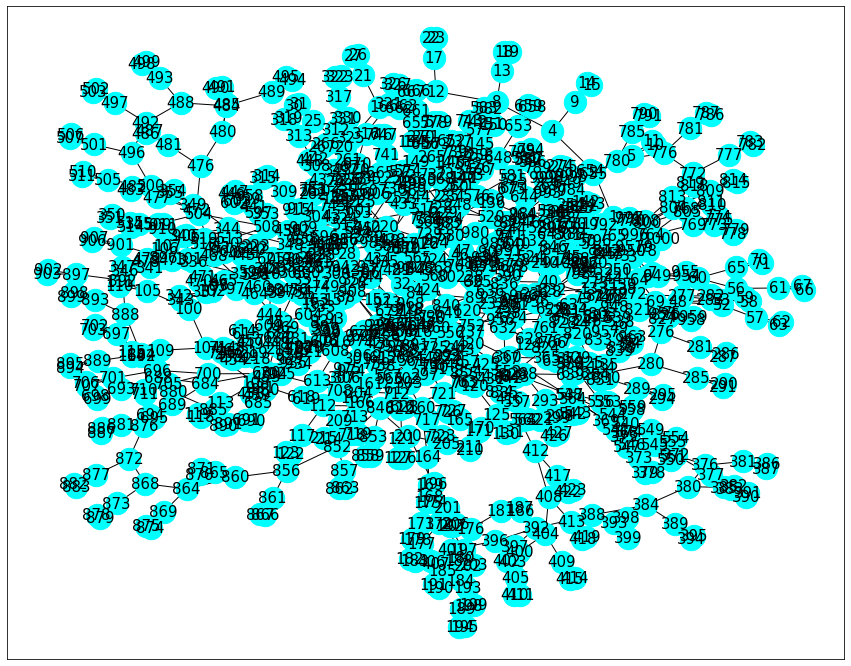

In [23]:
M = 2
nodes2 = [n for n in range(1,1001)]
mtree2 = M_ary_Node(m=M)
for n in nodes2: mtree2.add_child(n)
edges2 = get_edges(mtree2)

import networkx as nx
import matplotlib.pyplot as plt
def draw_graph(graph) :
    plt.figure(figsize=(15, 12))
    pos = nx.spring_layout(graph, scale=3)
    nx.draw_networkx_nodes(graph, pos=pos, node_size=500, node_color='cyan')
    nx.draw_networkx_edges(graph, pos=pos)
    nx.draw_networkx_labels(graph, pos=pos, font_size=15)
    plt.show()
    
graph2 = nx.Graph()
graph2.add_nodes_from(nodes2)
graph2.add_edges_from(edges2)
draw_graph(graph2)

In [24]:
n=int(input("숫자 입력"))
when_visit(mtree2, n)

숫자 입력512
Pre-Order: 130
Post-Order: 484
In_Order 481


In [25]:
print('''이진탐색을 응용하여 탐색한다면 더 적은 노드를 거쳐 방문이 가능 할 것이다.
            512를 최상단 노드에 두고 그것보다 큰 수를 한쪽 노드 밑에 작은 수를 다른 쪽 자식 노드에 둡니다. 
            이와 같은 방식으로 노드들을 전부 정렬한다면 더 적은 노드를 거쳐 방문이 가능할 것입니다.
            노드를 방문 할 때 마다 노드의 수와 찾고자 하는 수를 비교하여 찾아간다면 찾고자 하는 수가 없는 하위 노드들을
            거치지 않고도 노드를 탐색할 수 있기에 노드를 덜 방문 할 수 있습니다.
        ''')

이진탐색을 응용하여 탐색한다면 더 적은 노드를 거쳐 방문이 가능 할 것이다.
            512를 최상단 노드에 두고 그것보다 큰 수를 한쪽 노드 밑에 작은 수를 다른 쪽 자식 노드에 둡니다. 
            이와 같은 방식으로 노드들을 전부 정렬한다면 더 적은 노드를 거쳐 방문이 가능할 것입니다.
            노드를 방문 할 때 마다 노드의 수와 찾고자 하는 수를 비교하여 찾아간다면 찾고자 하는 수가 없는 하위 노드들을
            거치지 않고도 노드를 탐색할 수 있기에 노드를 덜 방문 할 수 있습니다.
        
